## import libraries

In [325]:
import numpy as np 
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

## Source of database
https://www.kaggle.com/datasets/hugomathien/soccer

## Connecting to the database

In [326]:
conn = sqlite3.connect('football.sqlite')
c = conn.cursor()

## What's in the tables?

Since we are actually running SQL queries in a python notebook, we need to write our SQL statements with a python wrapper around them. The key aspect is to place the SQL statement within each side of three speech marks.

We can view the tables in the database.

In [327]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


There are 7 tables that we will use in the analysis: Player attributes, Player, Match, League, Country, Team and Team attributes.

Let's start by looking at the number of teams from each country.

In [328]:
pd.options.display.max_columns=999

In [329]:
PlayerAttribute = pd.read_sql("Select * from Player_Attributes",conn)
PlayerAttribute.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Top 10 players in Europe over the period

In [330]:
TopPlayers = pd.read_sql_query(
 '''
        SELECT
        pl.player_name,
        strftime('%d-%m-%Y', pl.birthday) AS date_of_birth,
        pl.height,
        pl.weight,
        AVG(p.overall_rating) AS average_rating,
        p.potential
        
        FROM Player_Attributes AS p
        JOIN Player AS pl ON pl.player_api_id = p.player_api_id
        WHERE overall_rating > 90 
        GROUP BY player_name
        ORDER BY average_rating DESC
        LIMIT 10;
        
        
    ''', conn
)
TopPlayers

,player_name,date_of_birth,height,weight,average_rating,potential
0,Lionel Messi,24-06-1987,170.18,159,93.666667,94
1,Wayne Rooney,24-10-1985,175.26,183,93.000000,93
2,Cristiano Ronaldo,05-02-1985,185.42,176,92.052632,93
3,Gregory Coupet,31-12-1972,180.34,176,92.000000,93
4,Gianluigi Buffon,28-01-1978,193.04,201,92.000000,93
5,Xavi Hernandez,25-01-1980,170.18,148,91.500000,91
6,Thierry Henry,17-08-1977,187.96,183,91.000000,91
7,Ronaldinho,21-03-1980,182.88,168,91.000000,93
8,John Terry,07-12-1980,187.96,198,91.000000,90
9,Iker Casillas,20-05-1981,185.42,185,91.000000,92


In [331]:
TopPlayers.describe()

,height,weight,average_rating,potential
count,10.000000,10.000000,10.000000,10.000000
mean,181.864000,177.700000,91.821930,92.300000
std,7.778282,16.316658,0.925770,1.251666
min,170.180000,148.000000,91.000000,90.000000
25%,176.530000,170.000000,91.000000,91.250000
50%,184.150000,179.500000,91.750000,93.000000
75%,187.325000,184.500000,92.039474,93.000000
max,193.040000,201.000000,93.666667,94.000000


In [332]:
Player = pd.read_sql("Select * from Player",conn)
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [333]:
Match = pd.read_sql("Select * from Match",conn)
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [334]:
League = pd.read_sql("Select * from League",conn)
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [335]:
Country = pd.read_sql("Select * from Country",conn)
Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [336]:
Team = pd.read_sql("Select * from Team",conn)
Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [337]:
TeamAttributes = pd.read_sql("Select * from Team_Attributes",conn)
TeamAttributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## The number of teams by each country

We can look at the number of teams by each country. Note that the database spans several seasons and so even though there are 20 teams per season in England, we have 34 unique teams accounting for the fact that 3 teams are relegated each season with 3 teams joining the league.

In [338]:
num_teams = pd.read_sql_query(
    '''
        SELECT c.name AS Country,
        COUNT(DISTINCT t.team_long_name) AS teams
        FROM Country AS c
        JOIN Match AS m ON c.id = m.country_id
        JOIN Team AS t ON t.team_api_id = m.home_team_api_id
        GROUP BY c.name;
    ''', conn
)
num_teams

,Country,teams
0,Belgium,24
1,England,34
2,France,35
3,Germany,30
4,Italy,32
5,Netherlands,25
6,Poland,22
7,Portugal,29
8,Scotland,17
9,Spain,33


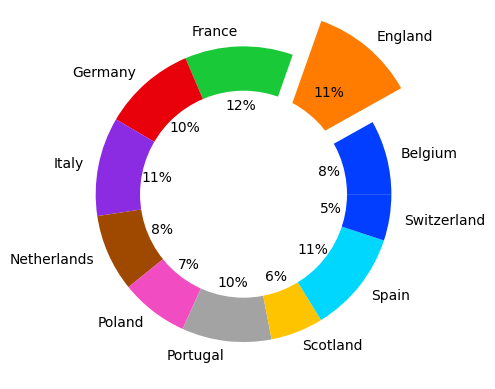

In [339]:
palette_color = sns.color_palette('bright')
explode = [0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(num_teams.loc[:,"teams"], labels=num_teams.loc[:,"Country"], 
        colors=palette_color, autopct='%.0f%%', explode = explode) 

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add Legends
# plt.legend(labels=num_teams.loc[:,"Country"], loc="upper right", title="Country")

# plt.show() 

#Save
plt.savefig("leagues.png", dpi=300,
           transparent = False,
           bbox_inches="tight")

## Chelsea's home matches in 2011/2012 season

My favorite club in England is Chelsea and in the 2011/2012 season, the club won the champions league but could only finish 6th in the premier league. We can take a look at the most goals Chelsea scored at home in the premier league.

In [357]:
chelsea = pd.read_sql_query(
    '''
        SELECT
        m.Season,
        ht.team_long_name AS home_team,
        at.team_long_name AS away_team,
        m.home_team_goal,
        m.away_team_goal
        
        FROM Match AS m
        JOIN Country AS c ON c.id = m.country_id
        JOIN League AS l ON l.id = m.league_id
        JOIN Team AS ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team AS at ON at.team_api_id = m.away_team_api_id
        
        WHERE home_team = 'Chelsea' AND Season = '2011/2012'
        ORDER by home_team_goal DESC
        LIMIT 10;
        
    ''', conn
)
chelsea

,season,home_team,away_team,home_team_goal,away_team_goal
0,2011/2012,Chelsea,Queens Park Rangers,6,1
1,2011/2012,Chelsea,Swansea City,4,1
2,2011/2012,Chelsea,Arsenal,3,5
3,2011/2012,Chelsea,Wolverhampton Wanderers,3,0
4,2011/2012,Chelsea,Manchester United,3,3
5,2011/2012,Chelsea,Bolton Wanderers,3,0
6,2011/2012,Chelsea,Norwich City,3,1
7,2011/2012,Chelsea,Everton,3,1
8,2011/2012,Chelsea,Manchester City,2,1
9,2011/2012,Chelsea,West Bromwich Albion,2,1


We can see that the most goals scored at home by Chelsea in the 2008/2009 season was 6.

## Total goals scored by home and away teams grouped by country and Season

In [341]:
goals = pd.read_sql_query(
    '''
        SELECT
        m.season,
        c.name AS Country,
        SUM(m.home_team_goal) AS Home_goals,
        SUM(m.away_team_goal) AS Away_goals,
        SUM(m.home_team_goal + m.away_team_goal) AS Total_goals
        
        FROM Match AS m
        JOIN Country AS c ON c.id = m.country_id
        GROUP BY Country, Season
        Order by Season, Home_goals DESC;
        
        
    ''', conn
)
goals

,season,Country,Home_goals,Away_goals,Total_goals
0,2008/2009,Spain,631,470,1101
1,2008/2009,Italy,578,410,988
2,2008/2009,England,532,410,942
3,2008/2009,Netherlands,524,346,870
4,2008/2009,Germany,520,374,894
...,...,...,...,...,...
83,2015/2016,Portugal,463,368,831
84,2015/2016,Belgium,402,292,694
85,2015/2016,Scotland,343,307,650
86,2015/2016,Poland,341,294,635


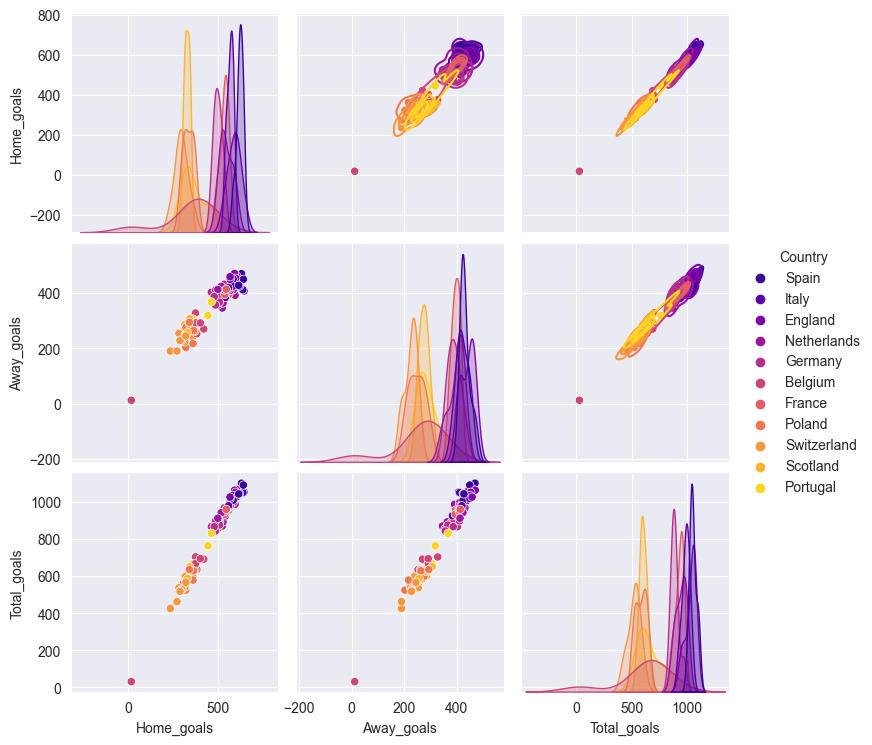

In [342]:
sns.set_style("darkgrid")
g=sns.pairplot(goals, hue='Country', palette="plasma")
g.map_upper(sns.kdeplot, n_levels=6, color="green");

## Top 10 total goals scored by a team over the period

In [343]:
goals_per_team = pd.read_sql_query(
    
    '''
        SELECT
        t.team_long_name AS team_name,
        m.Season,
        c.name AS Country,
        SUM(m.home_team_goal) as home_goals,
        SUM(m.away_team_goal) as away_goals,
        SUM(m.home_team_goal) + SUM(m.away_team_goal) AS total_goals
        
        FROM Match AS m 
        JOIN Country AS c ON m.country_id = c.id
        JOIN Team AS t on t.team_api_id = m.home_team_api_id
        GROUP BY Season, team_name
        ORDER BY total_goals DESC;
        
    ''', conn
) 

goals_per_team.head(10)

,team_name,season,Country,home_goals,away_goals,total_goals
0,Real Madrid CF,2011/2012,Spain,70,19,89
1,Real Madrid CF,2012/2013,Spain,67,21,88
2,Real Madrid CF,2015/2016,Spain,70,16,86
3,FC Barcelona,2011/2012,Spain,73,11,84
4,Chelsea,2009/2010,England,68,14,82
5,FC Barcelona,2015/2016,Spain,67,14,81
6,Real Madrid CF,2013/2014,Spain,63,17,80
7,Real Madrid CF,2014/2015,Spain,65,15,80
8,FC Barcelona,2013/2014,Spain,64,15,79
9,Real Madrid CF,2008/2009,Spain,49,29,78


In [344]:
League = pd.read_sql("Select * from League",conn)
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [345]:
Match = pd.read_sql("Select * from Match",conn)
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## We can also find out the total and average number of goals per league in 2011/2012 Season

In [354]:
goals_per_league = pd.read_sql_query(
    
    '''
        SELECT
        l.name AS League,
        m.season,
        m.home_team_goal,
        ROUND((AVG(m.home_team_goal + m.away_team_goal)),2) AS avg_goals,
        SUM(m.home_team_goal + m.away_team_goal) AS total_goals
        
        FROM Match AS m
        JOIN League AS l ON l.id = m.league_id
        WHERE season = "2011/2012"
        GROUP BY l.name
        ORDER BY avg_goals

        
    ''', conn
) 
goals_per_league

,League,season,home_team_goal,avg_goals,total_goals
0,Poland Ekstraklasa,2011/2012,1,2.20,527
1,France Ligue 1,2011/2012,0,2.52,956
2,Italy Serie A,2011/2012,4,2.58,925
3,Switzerland Super League,2011/2012,1,2.62,425
4,Portugal Liga ZON Sagres,2011/2012,0,2.64,634
5,Scotland Premier League,2011/2012,0,2.64,601
6,Spain LIGA BBVA,2011/2012,0,2.76,1050
7,England Premier League,2011/2012,1,2.81,1066
8,Germany 1. Bundesliga,2011/2012,3,2.86,875
9,Belgium Jupiler League,2011/2012,2,2.88,691


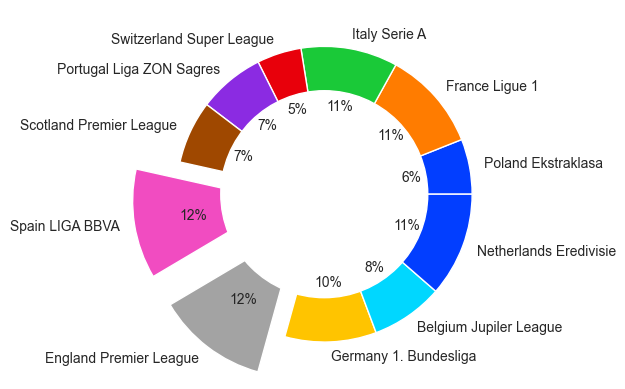

In [356]:
palette_color = sns.color_palette('bright')
explode = [0, 0, 0, 0, 0, 0, 0.3, 0.3, 0, 0, 0]

plt.pie(goals_per_league.loc[:,"total_goals"], labels=goals_per_league.loc[:,"League"], 
        colors=palette_color, autopct='%.0f%%', explode = explode) 

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

#Save
plt.savefig("leagues.png", dpi=300,
           transparent = False,
           bbox_inches="tight")

## Analyzing whether Chelsea Won, Lost or Tied a particular game.

In [55]:
chels = pd.read_sql_query(
    
    '''
        SELECT
        * 
        FROM Team
        WHERE team_long_name = "Chelsea";
        
    ''', conn
)

chels

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,3475,8455,5,Chelsea,CHE


In [358]:
chels_results = pd.read_sql_query(
    
    '''
        SELECT
        m.Season,
        m.Date,
        m.home_team_goal,
        m.away_team_goal,
        ht.team_long_name AS home_team,
        at.team_long_name AS away_team,
        CASE 
            WHEN ht.team_api_id = 8455 AND m.home_team_goal > m.away_team_goal THEN "Chelsea Won"
            WHEN ht.team_api_id = 8455 AND m.home_team_goal < m.away_team_goal THEN "Chelsea Lost"
            WHEN at.team_api_id = 8455 AND m.home_team_goal > m.away_team_goal THEN "Chelsea Lost"
            WHEN at.team_api_id = 8455 AND m.home_team_goal < m.away_team_goal THEN "Chelsea Won"
            ELSE "Chelsea Drew" END AS Result
        
        
        FROM Match as m 
        JOIN Team AS ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team AS at ON at.team_api_id = m.away_team_api_id
        
        WHERE home_team = "Chelsea" OR away_team = "Chelsea";
        
        
    ''', conn
)

chels_results



,season,date,home_team_goal,away_team_goal,home_team,away_team,Result
0,2008/2009,2008-08-17 00:00:00,4,0,Chelsea,Portsmouth,Chelsea Won
1,2008/2009,2008-10-29 00:00:00,0,3,Hull City,Chelsea,Chelsea Won
2,2008/2009,2008-11-01 00:00:00,5,0,Chelsea,Sunderland,Chelsea Won
3,2008/2009,2008-11-09 00:00:00,0,2,Blackburn Rovers,Chelsea,Chelsea Won
4,2008/2009,2008-11-15 00:00:00,0,3,West Bromwich Albion,Chelsea,Chelsea Won
...,...,...,...,...,...,...,...
299,2015/2016,2015-09-12 00:00:00,3,1,Everton,Chelsea,Chelsea Lost
300,2015/2016,2015-09-19 00:00:00,2,0,Chelsea,Arsenal,Chelsea Won
301,2015/2016,2015-09-26 00:00:00,2,2,Newcastle United,Chelsea,Chelsea Drew
302,2015/2016,2015-10-03 00:00:00,1,3,Chelsea,Southampton,Chelsea Lost


In [359]:
chels_results['Result'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 304 entries, 0 to 303
Series name: Result
Non-Null Count  Dtype 
--------------  ----- 
304 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [360]:
df = pd.DataFrame({'Category': chels_results['Result']})

# Calculate the frequency of each category
result_counts = df['Category'].value_counts()
result_counts 

Category
Chelsea Won     176
Chelsea Drew     70
Chelsea Lost     58
Name: count, dtype: int64

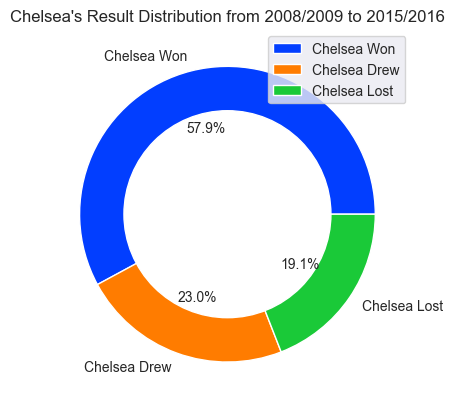

In [361]:
# Define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

# Create a pie chart
plt.pie(result_counts, labels=result_counts.index,
        colors=palette_color, autopct='%1.1f%%')

# Add a title
plt.title("Chelsea's Result Distribution from 2008/2009 to 2015/2016")

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels=result_counts.index, loc="upper right")

# Display the chart
# plt.show()

# Save
plt.savefig("chelsea.png", dpi=300,
           transparent = False,
           bbox_inches="tight")

## We can group by Season and Results to see how well Chelsea performed per season

In [365]:
chels_results = pd.read_sql_query(
    
    '''
        SELECT
        m.Season,
        
        CASE 
            WHEN ht.team_api_id = 8455 AND m.home_team_goal > m.away_team_goal THEN "Chelsea Won"
            WHEN ht.team_api_id = 8455 AND m.home_team_goal < m.away_team_goal THEN "Chelsea Lost"
            WHEN at.team_api_id = 8455 AND m.home_team_goal > m.away_team_goal THEN "Chelsea Lost"
            WHEN at.team_api_id = 8455 AND m.home_team_goal < m.away_team_goal THEN "Chelsea Won"
            ELSE "Chelsea Drew:" END AS Result,
        COUNT(m.Date) AS Performance
        
        FROM Match AS m 
        JOIN Team AS ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team AS at ON at.team_api_id = m.away_team_api_id
        
        WHERE at.team_api_id = 8455 OR ht.team_api_id = 8455
        GROUP BY m.Season, Result;
        
        
    ''', conn
)

chels_results.head(10) #first 10 results

,season,Result,Performance
0,2008/2009,Chelsea Drew:,8
1,2008/2009,Chelsea Lost,5
2,2008/2009,Chelsea Won,25
3,2009/2010,Chelsea Drew:,5
4,2009/2010,Chelsea Lost,6
5,2009/2010,Chelsea Won,27
6,2010/2011,Chelsea Drew:,8
7,2010/2011,Chelsea Lost,9
8,2010/2011,Chelsea Won,21
9,2011/2012,Chelsea Drew:,10


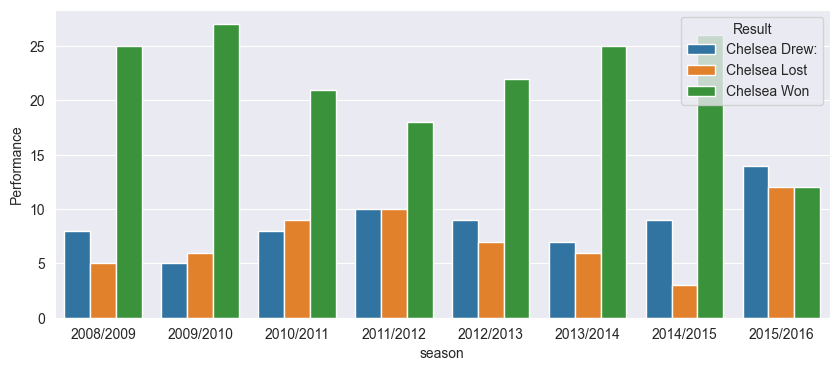

In [366]:
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.barplot(x='season', y='Performance', hue='Result', data=chels_results, ax=ax1)
#plt.show()

#Save
plt.savefig("chels_results.png", dpi=300,  #dpi makes the image of a higher quality
           transparent = False,
           bbox_inches="tight")

## We can analyze the average home and away goals scored by Chelsea

In [367]:
avg_goals = pd.read_sql_query(
    
    '''
        SELECT
        m.Season,
        ROUND(AVG(CASE WHEN ht.team_api_id = 8455 THEN m.home_team_goal END), 2) AS avg_home_goals,
        ROUND(AVG(CASE WHEN at.team_api_id = 8455 THEN m.away_team_goal END), 2) AS avg_away_goals
        
        FROM Match as m 
        JOIN Team as ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team as at ON at.team_api_id = m.away_team_api_id
        
        WHERE at.team_api_id = 8455 OR ht.team_api_id = 8455
        GROUP BY m.Season;
        
        
    ''', conn
)

avg_goals

,season,avg_home_goals,avg_away_goals
0,2008/2009,1.74,1.84
1,2009/2010,3.58,1.84
2,2010/2011,2.05,1.58
3,2011/2012,2.16,1.26
4,2012/2013,2.16,1.79
5,2013/2014,2.26,1.47
6,2014/2015,1.89,1.95
7,2015/2016,1.68,1.42


## Head-to-Head between Chelsea fc and Manchester Utd over the period

In [368]:
chelsmanutd = pd.read_sql_query(
    
    '''
        SELECT
        m.Season,
        m.Date,
        ht.team_long_name AS Home_club,
        at.team_long_name AS Away_club,
        m.home_team_goal,
        m.away_team_goal,
        CASE 
        WHEN m.home_team_api_id = 8455 AND m.home_team_goal > m.away_team_goal THEN "Chelsea Won"
        WHEN m.away_team_api_id = 8455 AND m.home_team_goal < m.away_team_goal THEN "Chelsea Won"
        WHEN m.home_team_api_id = 8455 AND m.home_team_goal = m.away_team_goal THEN "Draw"
        WHEN m.away_team_api_id = 8455 AND m.home_team_goal = m.away_team_goal THEN "Draw"
        ELSE "Man Utd Won" END AS head_to_head
        
        FROM Match as m 
        JOIN Team as ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team as at ON at.team_api_id = m.away_team_api_id
        
        WHERE m.home_team_api_id = 8455 and m.away_team_api_id = 10260 
        OR m.away_team_api_id = 8455 and m.home_team_api_id = 10260
        ;
        
        
    ''', conn
)
chelsmanutd

,season,date,Home_club,Away_club,home_team_goal,away_team_goal,head_to_head
0,2008/2009,2009-01-11 00:00:00,Manchester United,Chelsea,3,0,Man Utd Won
1,2008/2009,2008-09-21 00:00:00,Chelsea,Manchester United,1,1,Draw
2,2009/2010,2009-11-08 00:00:00,Chelsea,Manchester United,1,0,Chelsea Won
3,2009/2010,2010-04-03 00:00:00,Manchester United,Chelsea,1,2,Chelsea Won
4,2010/2011,2011-03-01 00:00:00,Chelsea,Manchester United,2,1,Chelsea Won
5,2010/2011,2011-05-08 00:00:00,Manchester United,Chelsea,2,1,Man Utd Won
6,2011/2012,2012-02-05 00:00:00,Chelsea,Manchester United,3,3,Draw
7,2011/2012,2011-09-18 00:00:00,Manchester United,Chelsea,3,1,Man Utd Won
8,2012/2013,2013-05-05 00:00:00,Manchester United,Chelsea,0,1,Chelsea Won
9,2012/2013,2012-10-28 00:00:00,Chelsea,Manchester United,2,3,Man Utd Won


In [369]:
df2 = pd.DataFrame({'head_to_head': chelsmanutd['head_to_head']})

# Calculate the frequency of each category
head_to_head = df2['head_to_head'].value_counts()
head_to_head 

head_to_head
Draw           6
Chelsea Won    6
Man Utd Won    4
Name: count, dtype: int64

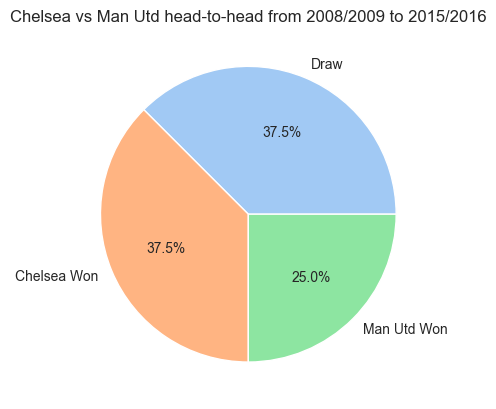

In [370]:
# define Seaborn color palette to use 
palette_color = sns.color_palette("pastel")

# Create a pie chart
plt.pie(head_to_head, labels=head_to_head .index,
        colors=palette_color, autopct='%1.1f%%')

# Add a title
plt.title("Chelsea vs Man Utd head-to-head from 2008/2009 to 2015/2016")

#Save
plt.savefig("head_to_head.png", dpi=300, #dpi makes the image of a higher quality
           transparent = False,
           bbox_inches="tight")

## Scores of Premier League matches

In [371]:
premier_league = pd.read_sql_query(
    
    '''
        SELECT
        m.Season,
        ht.team_long_name AS home_team,
        at.team_long_name AS away_team,
        m.home_team_goal AS home_goals,
        m.away_team_goal AS away_goals

        FROM Match AS m
        JOIN League AS l ON l.country_id = m.country_id
        JOIN Team AS ht ON ht.team_api_id = m.home_team_api_id
        JOIN Team AS at ON at.team_api_id = m.away_team_api_id
        
        WHERE l.name = "England Premier League"
        GROUP BY Season, home_team, away_team
        ORDER BY Season
        ;
        
        
    ''', conn
)

premier_league

,season,home_team,away_team,home_goals,away_goals
0,2008/2009,Arsenal,Aston Villa,0,2
1,2008/2009,Arsenal,Blackburn Rovers,4,0
2,2008/2009,Arsenal,Bolton Wanderers,1,0
3,2008/2009,Arsenal,Chelsea,1,4
4,2008/2009,Arsenal,Everton,3,1
...,...,...,...,...,...
3035,2015/2016,West Ham United,Sunderland,1,0
3036,2015/2016,West Ham United,Swansea City,1,4
3037,2015/2016,West Ham United,Tottenham Hotspur,1,0
3038,2015/2016,West Ham United,Watford,3,1
